In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data_caffee = pd.read_csv('cafe.csv',index_col='Date')
data_wti = pd.read_csv('WTI_USD Historical Data.csv', index_col='Date')
data_sp500 = pd.read_csv('SP 500 Historical Data.csv', index_col='Date')
data_sp500.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
10/15/2023,"4,224.16","4,351.28","4,393.73","4,222.38",NaN,-2.39%
10/08/2023,"4,327.78","4,288.38","4,386.00","4,283.82",NaN,0.45%
10/01/2023,"4,308.50","4,280.50","4,324.63","4,216.31",NaN,0.48%
09/24/2023,"4,288.05","4,309.13","4,338.84","4,238.53",NaN,-0.74%
09/17/2023,"4,320.06","4,447.13","4,466.28","4,316.43",NaN,-2.93%


In [66]:
df = pd.DataFrame()
df['Coffee KC'] = data_caffee['Price']
df['Oil WTI'] = data_wti['Price']
df['S&P500'] = data_sp500['Price']

# Assuming your DataFrame is named df and the column is 'column_name'
df['S&P500'] = df['S&P500'].str.replace(',', '').astype(float)



df


,Coffee KC,Oil WTI,S&P500
Date,,,
10/15/2023,165.25,89.60,4224.16
10/08/2023,154.90,87.86,4327.78
10/01/2023,146.05,83.09,4308.50
09/24/2023,146.15,91.19,4288.05
09/17/2023,151.15,90.93,4320.06
...,...,...,...
02/06/2000,108.80,29.44,1387.12
01/30/2000,112.90,28.82,1424.37
01/23/2000,114.70,27.22,1360.16


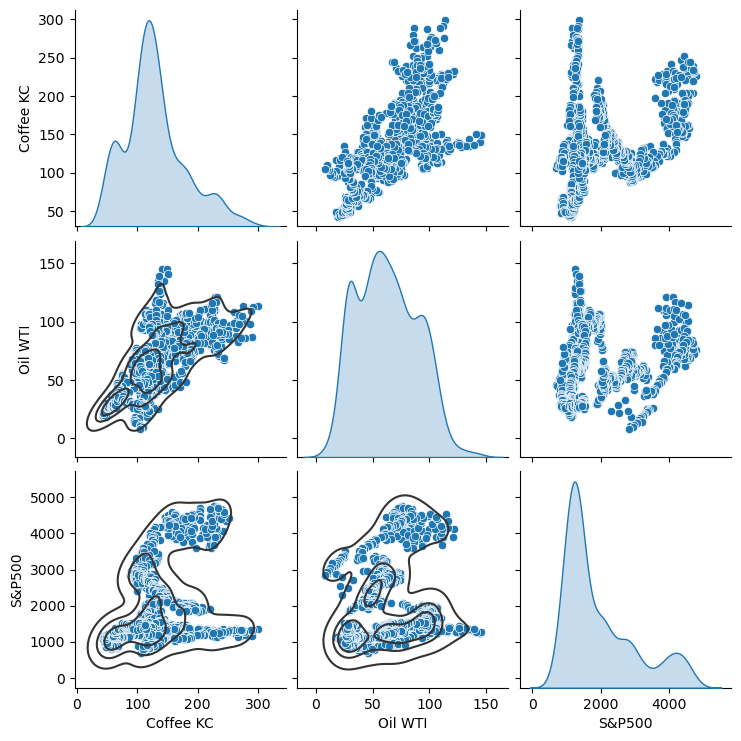

In [67]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [69]:
matriz_correlacion = df.corr()

In [73]:
matriz_correlacion

,Coffee KC,Oil WTI,S&P500
Coffee KC,1.000000,0.711591,0.372881
Oil WTI,0.711591,1.000000,0.160866
S&P500,0.372881,0.160866,1.000000


In [81]:
# Extraer los años de las fechas predichas
years = [date.split("-")[0] for date in df.index]

# Eliminar años duplicados
unique_years = list(set(years))

# Encontrar los índices donde cambian los años
year_indices = [years.index(year) for year in unique_years]